In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
dt = pd.read_csv('blackFriday_train.csv')

In [7]:
dt.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
df = dt.copy()
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df = dt.copy()
[(feature, len(df[feature].unique())) for feature in df.columns]

[('User_ID', 5891),
 ('Product_ID', 3631),
 ('Gender', 2),
 ('Age', 7),
 ('Occupation', 21),
 ('City_Category', 3),
 ('Stay_In_Current_City_Years', 5),
 ('Marital_Status', 2),
 ('Product_Category_1', 20),
 ('Product_Category_2', 18),
 ('Product_Category_3', 16),
 ('Purchase', 18105)]

In [12]:
#categorical_features 
[feature for feature in df.columns if len(df[feature].unique())<22]

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [13]:
categorical_features = [feature for feature in df.columns if len(df[feature].unique())<22]

In [14]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0':'0', '1': '1', '2':'2','3':'3', '4':'4'})

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', nan, '3', '1', '0'], dtype=object)

In [17]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [18]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
df['Age'] = df['Age'].map({'0-17':0,'18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})

In [20]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [21]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [22]:
df['City_Category'] = df['City_Category'].map({'A':0, 'B':1, 'C':2})

In [23]:
df.rename(columns = {'Product_Category_1': 'Cat1', 'Product_Category_2':'Cat2', 'Product_Category_3':'Cat3', 'City_Category': 'City'}, inplace = True)

In [24]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City                               0
Stay_In_Current_City_Years     84726
Marital_Status                     0
Cat1                               0
Cat2                          173638
Cat3                          383247
Purchase                           0
dtype: int64

In [25]:
df.Stay_In_Current_City_Years.value_counts()

1    193821
2    101838
3     95285
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

In [26]:
df.Stay_In_Current_City_Years.mode()

0    1
dtype: object

In [27]:
df.drop('User_ID', axis = 1, inplace = True)

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,City,Stay_In_Current_City_Years,Marital_Status,Cat1,Cat2,Cat3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,2,NaN,0,8,NaN,NaN,7969


In [29]:
df['Product_ID'] = df['Product_ID'].str.replace('P', '').astype(int)

In [30]:
# NAN values imputation
df['Stay_In_Current_City_Years'].unique()

array(['2', nan, '3', '1', '0'], dtype=object)

In [31]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].fillna(df['Stay_In_Current_City_Years'].mode()[0]).astype(int)

In [32]:

df['Cat2'] = df['Cat2'].fillna(df['Cat2'].mode()[0]).astype(int)

In [33]:
df['Cat3'] = df['Cat3'].fillna(df['Cat3'].mode()[0]).astype(int)

In [34]:
df.dtypes

Product_ID                    int32
Gender                        int64
Age                           int64
Occupation                    int64
City                          int64
Stay_In_Current_City_Years    int32
Marital_Status                int64
Cat1                          int64
Cat2                          int32
Cat3                          int32
Purchase                      int64
dtype: object

<AxesSubplot:>

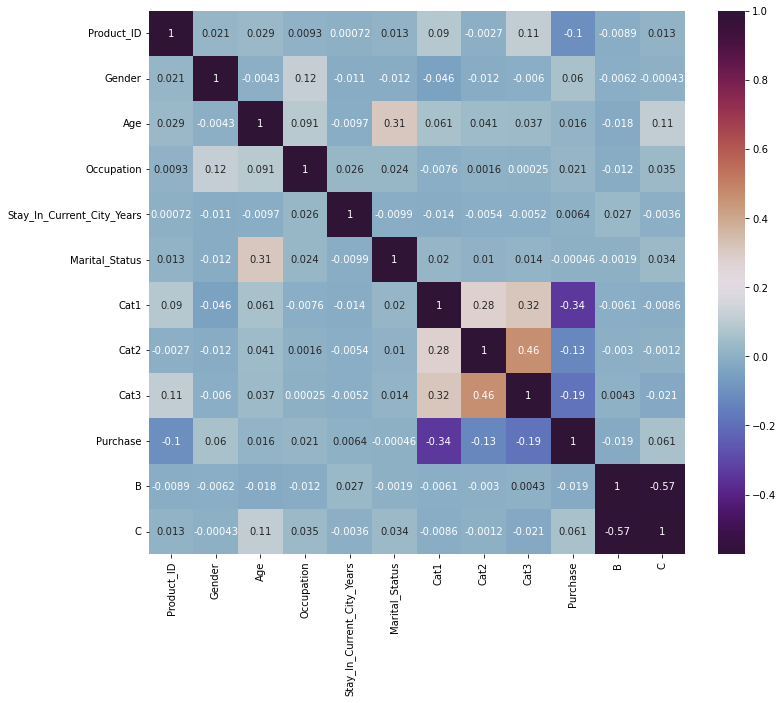

In [96]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True,cmap = 'twilight_shifted' )


In [36]:
for i in ['pearson', 'kendall', 'spearman']:
    print(i, '\n',df.corr(method  = i)['Purchase'])

pearson 
 Product_ID                   -0.103961
Gender                        0.060346
Age                           0.015839
Occupation                    0.020833
City                          0.061914
Stay_In_Current_City_Years    0.006400
Marital_Status               -0.000463
Cat1                         -0.343703
Cat2                         -0.128651
Cat3                         -0.185945
Purchase                      1.000000
Name: Purchase, dtype: float64


C:\Users\43117073062\Anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


kendall 
 Product_ID                   -0.064400
Gender                        0.044437
Age                           0.014880
Occupation                    0.015318
City                          0.048512
Stay_In_Current_City_Years    0.004858
Marital_Status                0.000910
Cat1                         -0.285766
Cat2                         -0.102855
Cat3                         -0.142583
Purchase                      1.000000
Name: Purchase, dtype: float64
spearman 
 Product_ID                   -0.095616
Gender                        0.054420
Age                           0.020098
Occupation                    0.022177
City                          0.062851
Stay_In_Current_City_Years    0.006407
Marital_Status                0.001115
Cat1                         -0.383355
Cat2                         -0.141491
Cat3                         -0.184914
Purchase                      1.000000
Name: Purchase, dtype: float64


In [37]:
[(feature, len(df[feature].unique())) for feature in df.columns]

[('Product_ID', 3631),
 ('Gender', 2),
 ('Age', 7),
 ('Occupation', 21),
 ('City', 3),
 ('Stay_In_Current_City_Years', 4),
 ('Marital_Status', 2),
 ('Cat1', 20),
 ('Cat2', 17),
 ('Cat3', 15),
 ('Purchase', 18105)]

In [38]:
[ feature for feature in df.columns if feature not in categorical_features]

['Product_ID', 'City', 'Cat1', 'Cat2', 'Cat3', 'Purchase']

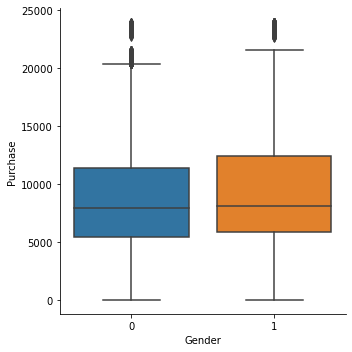

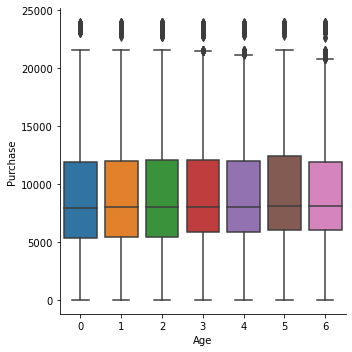

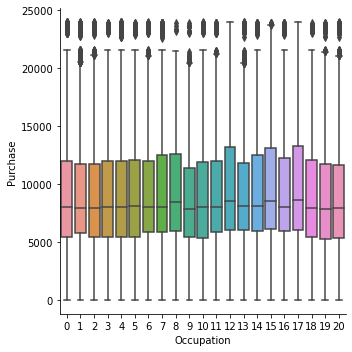

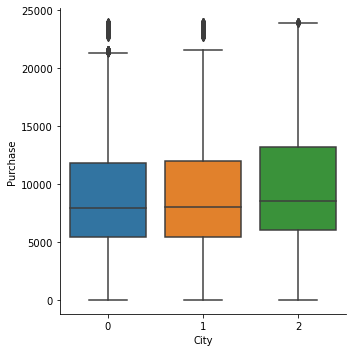

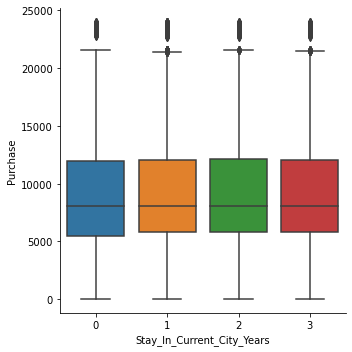

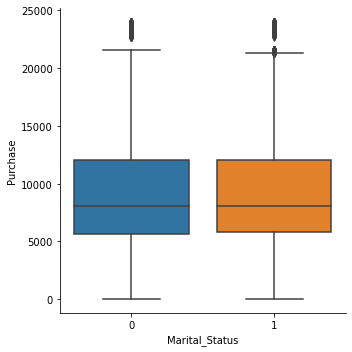

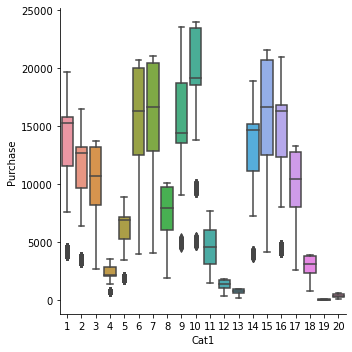

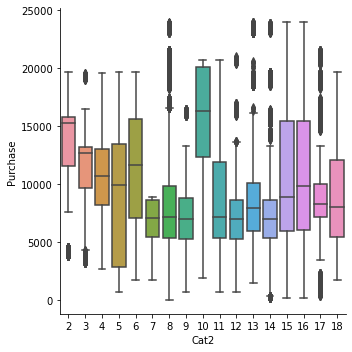

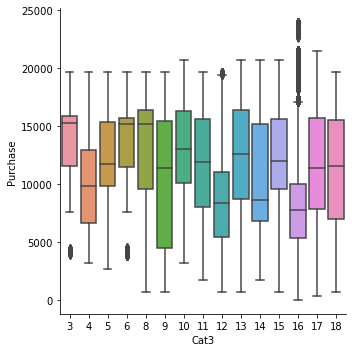

In [138]:
for feature in df.columns:
    if feature not in ['Product_ID', 'Purchase']:
        sns.catplot(x = feature, y = 'Purchase', kind = 'box', data = df)
    

In [40]:
categorical_features = [feature for feature in df.columns if len(df[feature].unique())<22]

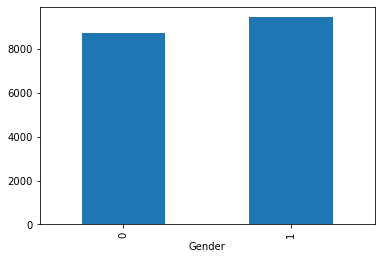

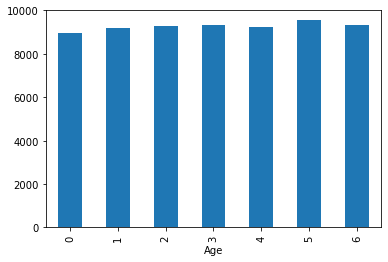

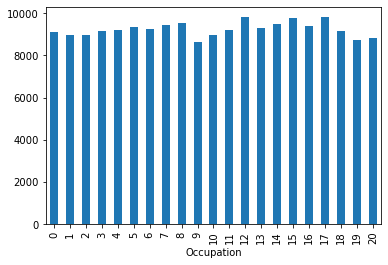

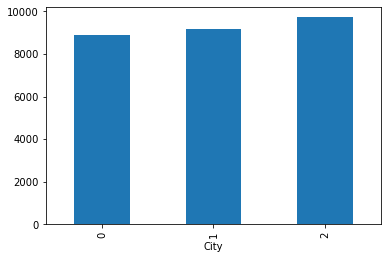

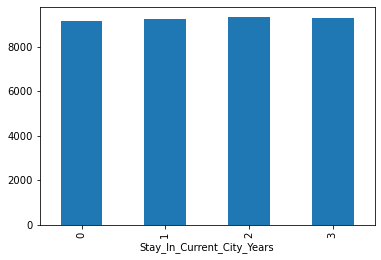

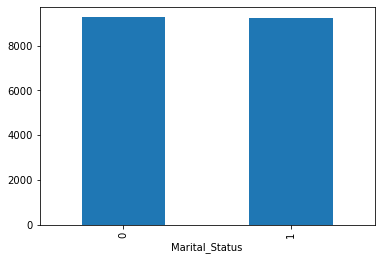

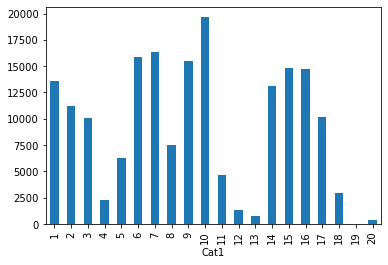

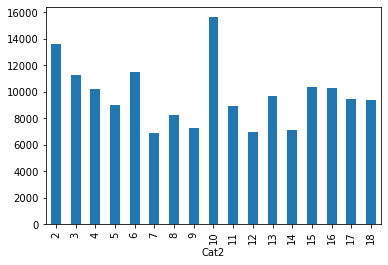

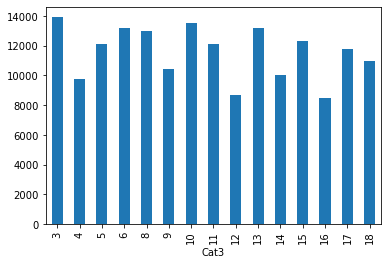

In [41]:
for feature in categorical_features:
    df.groupby(feature)['Purchase'].mean().plot.bar()
    plt.show()


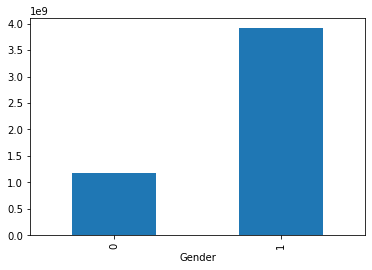

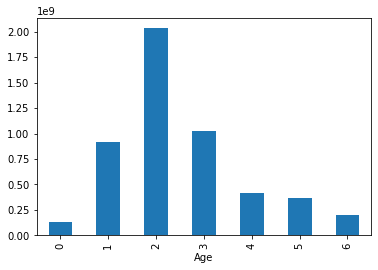

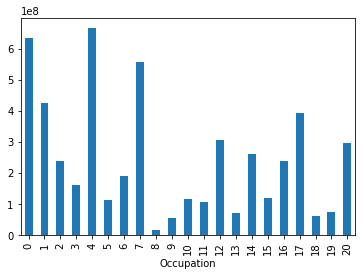

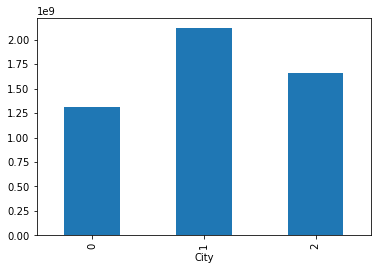

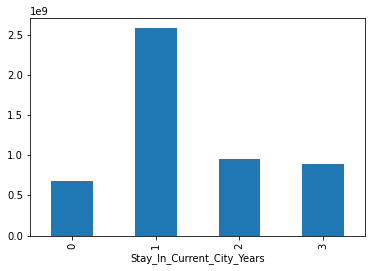

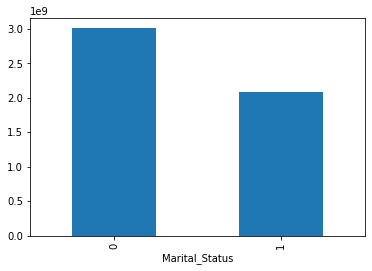

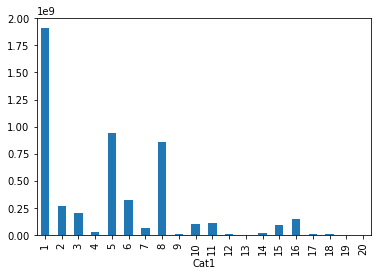

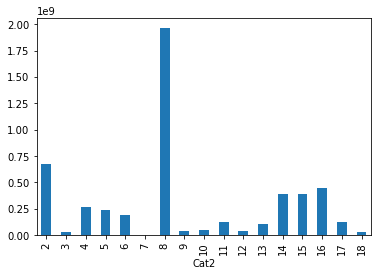

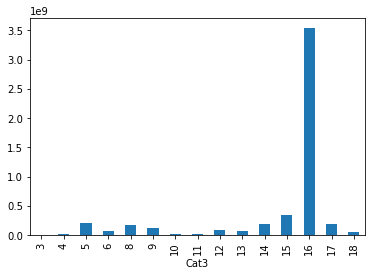

In [50]:
for feature in categorical_features:
    df.groupby(feature)['Purchase'].sum().plot.bar()
    plt.show()


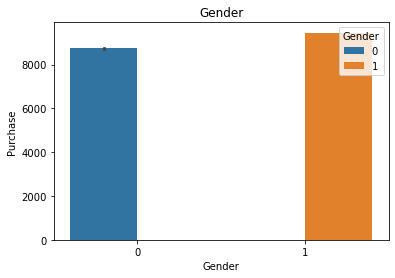

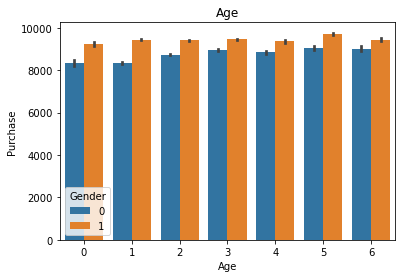

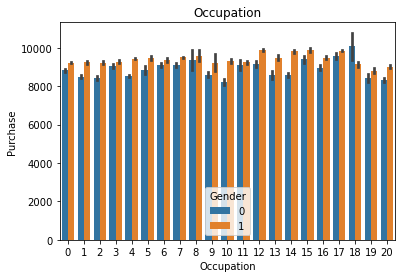

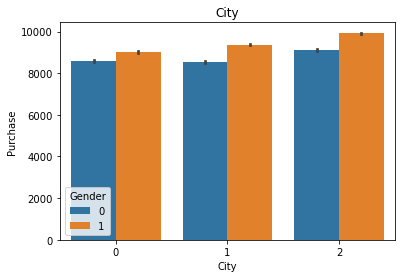

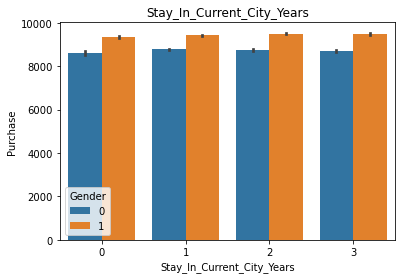

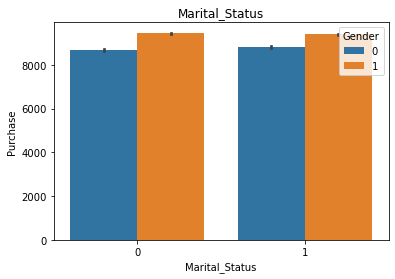

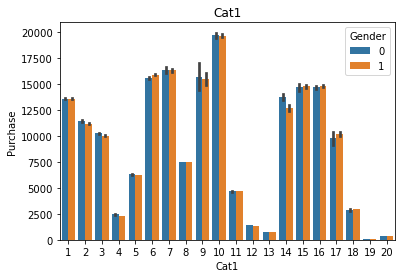

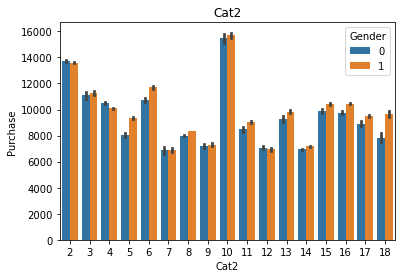

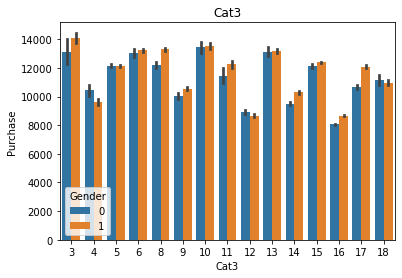

In [43]:
data = df.copy()
for feature in categorical_features:
    sns.barplot(data = data, x = feature, y = 'Purchase', hue = 'Gender')
    plt.title(feature)
    plt.show()

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


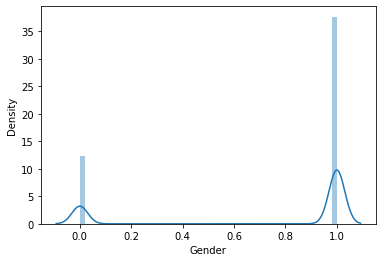

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


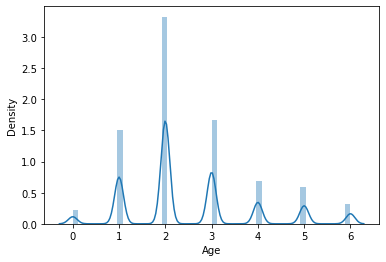

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


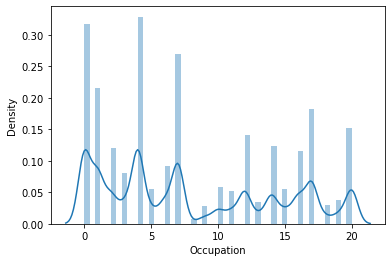

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


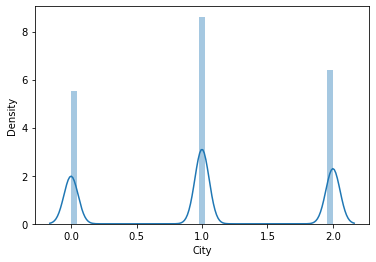

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


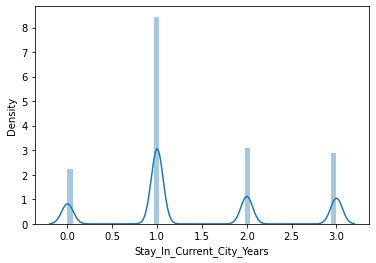

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


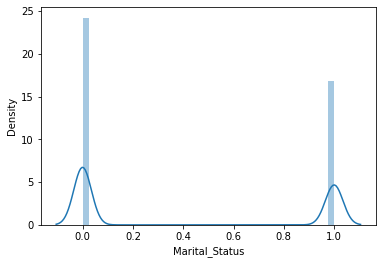

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


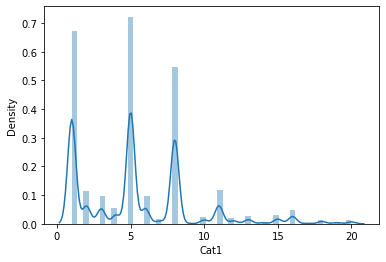

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


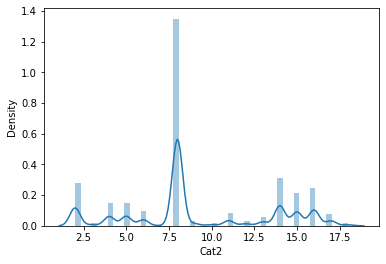

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


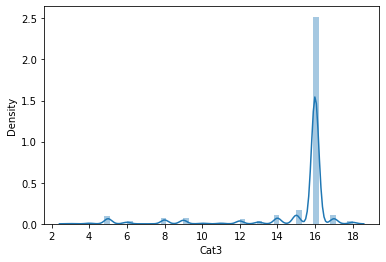

In [44]:
for feature in categorical_features:
    sns.distplot(df[feature])
    plt.show()

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

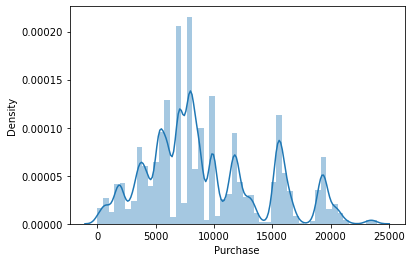

In [89]:
sns.distplot(df['Purchase'])


In [60]:
dummy_cities = pd.get_dummies(df['City'],drop_first=True)

In [65]:
pd.concat([df, dummy_cities], axis = 1)

,Product_ID,Gender,Age,Occupation,City,Stay_In_Current_City_Years,Marital_Status,Cat1,Cat2,Cat3,Purchase,1,2
0,69042,0,0,10,0,2,0,3,8,16,8370,0,0
1,248942,0,0,10,0,2,0,1,6,14,15200,0,0
2,87842,0,0,10,0,2,0,12,8,16,1422,0,0
3,85442,0,0,10,0,2,0,12,14,16,1057,0,0
4,285442,1,6,16,2,1,0,8,8,16,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,372445,1,5,13,1,1,1,20,8,16,368,1,0
550064,375436,0,2,1,2,3,0,20,8,16,371,0,1
550065,375436,0,2,15,1,1,1,20,8,16,137,1,0
550066,375436,0,6,1,2,2,0,20,8,16,365,0,1


In [66]:
df = pd.concat([df, dummy_cities], axis = 1)

In [69]:
df.rename(columns = {1:'B',2:'C' }, inplace = True)

In [76]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)


In [81]:
df.drop('City', axis = 1, inplace = True)

In [82]:
df.dtypes

Product_ID                    int32
Gender                        int64
Age                           int64
Occupation                    int64
Stay_In_Current_City_Years    int32
Marital_Status                int64
Cat1                          int64
Cat2                          int32
Cat3                          int32
Purchase                      int64
B                             int32
C                             int32
dtype: object

In [83]:
data = df.copy()
X = data.drop('Purchase', axis = 1)
y = data['Purchase']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=14)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
